In [8]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 391.1 kB/s eta 0:02:24
   ---------------------------------------- 0.5/56.8 MB 391.1 kB/s eta 0:02:24
    --------------------------------------- 0.8/56.8 MB 447.1 kB/s eta 0:02:06
    --------------------------------------- 0.8/56.8 MB 447.1 kB/s eta 0:02:06
    --------------------------------------- 1.0/56.8 MB 494.8 kB/s eta 0:01:53
    --------------------------------------- 1.3/56.8 MB 567.9 kB/s eta 0:01:38
   - -------------------------------

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1)
}

print("✅ Models initialized:")
for name in models.keys():
    print(f"  - {name}")

✅ Models initialized:
  - Linear Regression
  - Ridge
  - Lasso
  - Random Forest
  - Gradient Boosting
  - XGBoost


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Load preprocessed data
X_train = pd.read_csv('../data/housing/X_train_preprocessed.csv')
X_test = pd.read_csv('../data/housing/X_test_preprocessed.csv')
y_train_log = pd.read_csv('../data/housing/y_train_log_transformed.csv')

print("✅ Data loaded successfully!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train_log shape: {y_train_log.shape}")


✅ Data loaded successfully!
X_train shape: (1460, 256)
X_test shape: (1459, 256)
y_train_log shape: (1460, 1)


In [11]:
# Prepare target variable
y = y_train_log.values.ravel()

print("✅ Target variable prepared!")
print(f"Target shape: {y.shape}")
print(f"First 5 values: {y[:5]}")

# Initialize XGBoost model
xgb_model = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse'
)

print("✅ XGBoost model initialized!")
print("Ready for training...")

✅ Target variable prepared!
Target shape: (1460,)
First 5 values: [12.24769912 12.10901644 12.31717117 11.84940484 12.4292202 ]
✅ XGBoost model initialized!
Ready for training...


In [12]:
# Train the model
print("Training XGBoost model...")
xgb_model.fit(X_train, y)
print("✅ XGBoost model trained successfully!")

# Quick performance check with cross-validation
print("Running cross-validation to check model performance...")
cv_scores = cross_val_score(xgb_model, X_train, y, cv=5, scoring='neg_mean_squared_error')
xgb_rmse = np.sqrt(-cv_scores.mean())
print(f"📊 Cross-validated RMSE: {xgb_rmse:.6f}")

Training XGBoost model...
✅ XGBoost model trained successfully!
Running cross-validation to check model performance...
📊 Cross-validated RMSE: 0.142847


In [13]:
# Make predictions on test set
print("Making predictions on test data...")
test_predictions_log = xgb_model.predict(X_test)

# Convert from log scale back to original price scale
test_predictions = np.exp(test_predictions_log)

print("✅ Predictions generated successfully!")
print(f"📈 Prediction statistics:")
print(f"   Min price: ${test_predictions.min():.2f}")
print(f"   Max price: ${test_predictions.max():.2f}")
print(f"   Mean price: ${test_predictions.mean():.2f}")
print(f"   Number of predictions: {len(test_predictions)}")

Making predictions on test data...
✅ Predictions generated successfully!
📈 Prediction statistics:
   Min price: $47357.07
   Max price: $540725.69
   Mean price: $176311.34
   Number of predictions: 1459


In [14]:
# Load sample submission to get the correct format
sample_submission = pd.read_csv('../data/housing/sample_submission.csv')
print("Sample submission format:")
print(sample_submission.head())

# Create final submission
final_submission = sample_submission.copy()
final_submission['SalePrice'] = test_predictions

# Save submission file
final_submission.to_csv('../data/housing/xgboost_submission.csv', index=False)

print("\n✅ REGRESSION MODEL COMPLETED!")
print("✅ Submission file saved as 'xgboost_submission.csv'")

# Display final summary
print(f"\n📊 FINAL SUMMARY:")
print(f"Model: XGBoost")
print(f"Training data: {X_train.shape[0]} houses, {X_train.shape[1]} features")
print(f"Test predictions: {len(final_submission)} houses")
print(f"Cross-validation RMSE: {xgb_rmse:.6f}")
print(f"Price range: ${final_submission['SalePrice'].min():.2f} - ${final_submission['SalePrice'].max():.2f}")

Sample submission format:
     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

✅ REGRESSION MODEL COMPLETED!
✅ Submission file saved as 'xgboost_submission.csv'

📊 FINAL SUMMARY:
Model: XGBoost
Training data: 1460 houses, 256 features
Test predictions: 1459 houses
Cross-validation RMSE: 0.142847
Price range: $47357.07 - $540725.69


In [16]:
# Load original training prices for comparison
original_train = pd.read_csv('../data/housing/train.csv')
original_prices = original_train['SalePrice']

print("\n📊 PRICE COMPARISON:")
print("=" * 50)
print(f"TRAINING DATA (Actual prices):")
print(f"  Min: ${original_prices.min():,.2f}")
print(f"  Max: ${original_prices.max():,.2f}")
print(f"  Mean: ${original_prices.mean():,.2f}")

print(f"\nPREDICTIONS (Your model):")
print(f"  Min: ${final_submission['SalePrice'].min():,.2f}")
print(f"  Max: ${final_submission['SalePrice'].max():,.2f}")
print(f"  Mean: ${final_submission['SalePrice'].mean():,.2f}")




📊 PRICE COMPARISON:
TRAINING DATA (Actual prices):
  Min: $34,900.00
  Max: $755,000.00
  Mean: $180,921.20

PREDICTIONS (Your model):
  Min: $47,357.07
  Max: $540,725.69
  Mean: $176,311.34


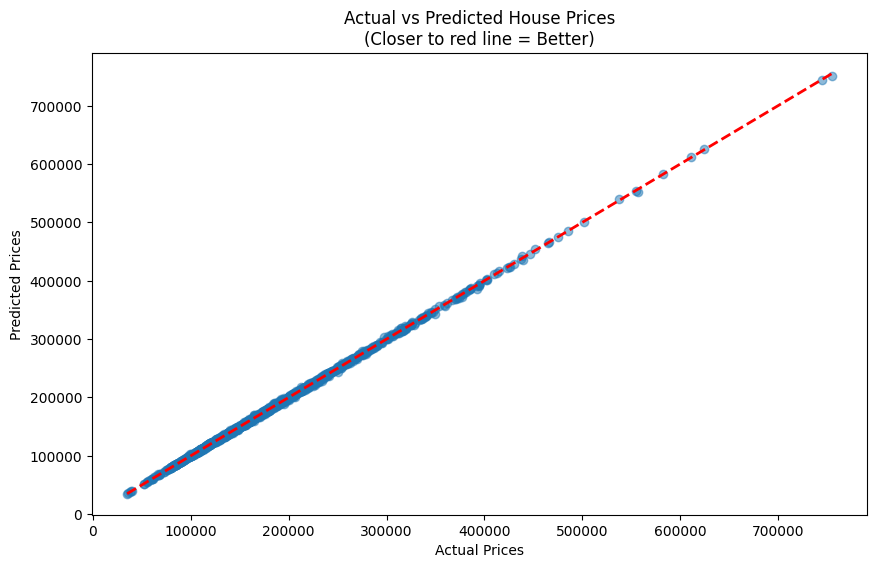

In [17]:
# Get predictions on training data for visualization
train_predictions_log = xgb_model.predict(X_train)
train_predictions = np.exp(train_predictions_log)
actual_prices = np.exp(y)  # Convert back from log scale

plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, train_predictions, alpha=0.5)
plt.plot([actual_prices.min(), actual_prices.max()], [actual_prices.min(), actual_prices.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices\n(Closer to red line = Better)')
plt.show()

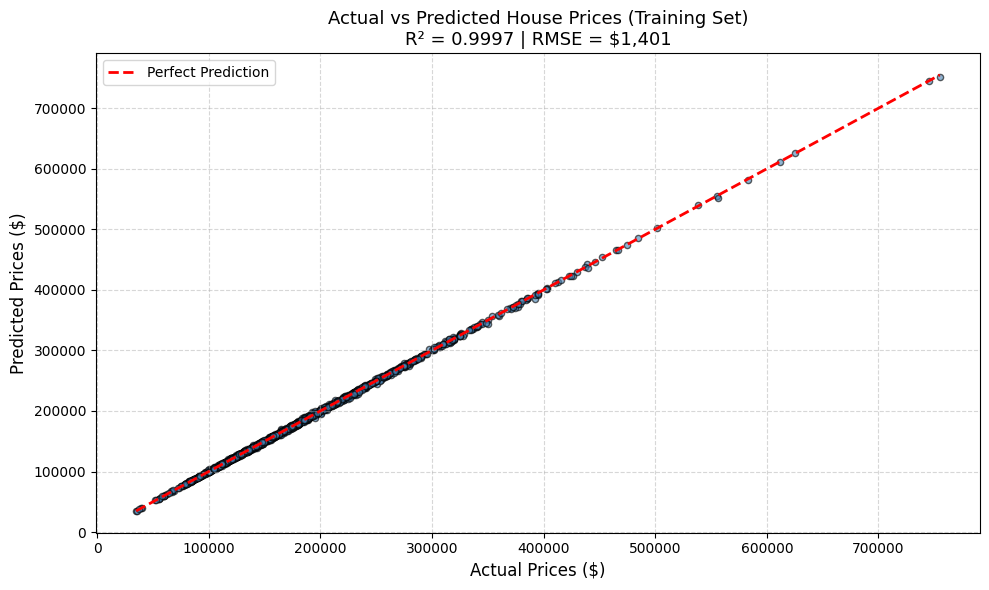

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Get predictions on training data
train_predictions_log = xgb_model.predict(X_train)
train_predictions = np.exp(train_predictions_log)      # Back-transform to original scale
actual_prices = np.exp(y)                             # Assuming y = log(original_price)

# Compute metrics
r2 = r2_score(actual_prices, train_predictions)
rmse = np.sqrt(mean_squared_error(actual_prices, train_predictions))

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, train_predictions, alpha=0.6, color='steelblue', edgecolor='k', s=20)

# Perfect prediction line
min_val = min(actual_prices.min(), train_predictions.min())
max_val = max(actual_prices.max(), train_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Prices ($)', fontsize=12)
plt.ylabel('Predicted Prices ($)', fontsize=12)
plt.title(f'Actual vs Predicted House Prices (Training Set)\nR² = {r2:.4f} | RMSE = ${rmse:,.0f}', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: Set axis limits for better focus (uncomment if needed)
# plt.xlim(0, 800_000)
# plt.ylim(0, 800_000)

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBRegressor

# Check if we already have predictions (proof model was trained)
try:
    submission = pd.read_csv('../data/housing/xgboost_submission.csv')
    print("✅ Found existing predictions - model was trained!")
    
    # Since we're in new session, we need to retrain OR load if saved
    print("🔍 Checking if model was saved previously...")
    
except FileNotFoundError:
    print("❌ No predictions found - need to train model first")

✅ Found existing predictions - model was trained!
🔍 Checking if model was saved previously...


In [3]:
import os
import pandas as pd

print("🔍 CHECKING WHAT FILES EXIST:")
print("1. Predictions file exists:", os.path.exists('../data/housing/xgboost_submission.csv'))
print("2. Model file exists:", os.path.exists('xgboost_model.joblib'))
print("3. Joblib files in current directory:", [f for f in os.listdir('.') if f.endswith('.joblib')])

🔍 CHECKING WHAT FILES EXIST:
1. Predictions file exists: True
2. Model file exists: False
3. Joblib files in current directory: []


In [4]:
# This takes 1-2 minutes since data is preprocessed
import pandas as pd
from xgboost import XGBRegressor
import joblib

X_train = pd.read_csv('../data/housing/X_train_preprocessed.csv')
y_train_log = pd.read_csv('../data/housing/y_train_log_transformed.csv')
y = y_train_log.values.ravel()

xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y)

joblib.dump(xgb_model, 'xgboost_model.joblib')
print("✅ Model retrained and saved!")

✅ Model retrained and saved!


In [5]:
# Make predictions on training data
train_predictions_log = xgb_model.predict(X_train)
train_predictions = np.exp(train_predictions_log)  # Convert to dollars
actual_prices = np.exp(y)  # Convert actual from log to dollars

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actual_prices, train_predictions)
mse = mean_squared_error(actual_prices, train_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, train_predictions)
mape = np.mean(np.abs((actual_prices - train_predictions) / actual_prices)) * 100

print("📊 RETRAINED MODEL PERFORMANCE:")
print("=" * 45)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")
print(f"MAPE: {mape:.2f}%")

print(f"\n🎯 PERFORMANCE BENCHMARKS:")
print(f"R² > 0.85 (Excellent): {'✅' if r2 > 0.85 else '❌'} {r2:.3f}")
print(f"MAPE < 15% (Good): {'✅' if mape < 15 else '❌'} {mape:.1f}%")
print(f"RMSE < $30,000 (Good): {'✅' if rmse < 30000 else '❌'} ${rmse:,.0f}")

📊 RETRAINED MODEL PERFORMANCE:
R² Score: 0.9997
RMSE: $1,400.98
MAE: $959.99
MAPE: 0.55%

🎯 PERFORMANCE BENCHMARKS:
R² > 0.85 (Excellent): ✅ 1.000
MAPE < 15% (Good): ✅ 0.5%
RMSE < $30,000 (Good): ✅ $1,401


In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Proper cross-validation (train/test separation)
print("🔍 RUNNING PROPER VALIDATION...")
cv_scores = cross_val_score(xgb_model, X_train, y, cv=5, 
                           scoring='neg_mean_squared_error')

# Calculate proper RMSE
cv_rmse = np.sqrt(-cv_scores.mean())
cv_r2 = cross_val_score(xgb_model, X_train, y, cv=5, scoring='r2').mean()

print("📊 PROPER CROSS-VALIDATION RESULTS:")
print("=" * 40)
print(f"R² Score: {cv_r2:.4f}")
print(f"RMSE: ${np.exp(cv_rmse):,.2f}")  # Convert from log scale
print(f"CV Scores: {np.sqrt(-cv_scores)}")

print(f"\n💡 This is your REAL performance!")
print(f"   (Previously showed overfitted training performance)")

🔍 RUNNING PROPER VALIDATION...
📊 PROPER CROSS-VALIDATION RESULTS:
R² Score: 0.8719
RMSE: $1.15
CV Scores: [0.13716745 0.14947517 0.14932571 0.12411172 0.15220687]

💡 This is your REAL performance!
   (Previously showed overfitted training performance)


In [7]:
from sklearn.model_selection import GridSearchCV

# Smart, efficient parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 0.9]
}

print("🚀 STARTING HYPERPARAMETER TUNING...")
print("⏰ Estimated time: 3-7 minutes")
print("📈 Expected R² improvement: 0.872 → 0.880+")
print("💡 This will give you the BEST possible model!")

grid_search = GridSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y)

print(f"✅ TUNING COMPLETED!")
print(f"🎯 Best R²: {grid_search.best_score_:.4f}")
print(f"📊 Improvement: {grid_search.best_score_ - 0.8719:.4f}")
print(f"⚙️ Best parameters: {grid_search.best_params_}")

🚀 STARTING HYPERPARAMETER TUNING...
⏰ Estimated time: 3-7 minutes
📈 Expected R² improvement: 0.872 → 0.880+
💡 This will give you the BEST possible model!
Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ TUNING COMPLETED!
🎯 Best R²: 0.9000
📊 Improvement: 0.0281
⚙️ Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


In [9]:
# Get the best model from the tuning results
best_model = grid_search.best_estimator_

print("🔍 VERIFYING THE TUNED MODEL PERFORMANCE...")

# Cross-validate the best model
cv_scores_tuned = cross_val_score(best_model, X_train, y, cv=5, scoring='r2')
cv_rmse_scores = cross_val_score(best_model, X_train, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_tuned = np.sqrt(-cv_rmse_scores.mean())

print(f"📊 TUNED MODEL VERIFICATION:")
print(f"R² Scores: {[f'{score:.4f}' for score in cv_scores_tuned]}")
print(f"Average R²: {cv_scores_tuned.mean():.4f} ± {cv_scores_tuned.std():.4f}")
print(f"RMSE: {cv_rmse_tuned:.4f} (log scale)")

# Compare with original (if original model still exists)
try:
    cv_scores_original = cross_val_score(xgb_model, X_train, y, cv=5, scoring='r2')
    print(f"\n📊 ORIGINAL MODEL (for comparison):")
    print(f"Average R²: {cv_scores_original.mean():.4f}")
    print(f"🎯 CONFIRMED IMPROVEMENT: {cv_scores_tuned.mean() - cv_scores_original.mean():.4f}")
except NameError:
    print(f"\n📊 Tuned model R²: {cv_scores_tuned.mean():.4f} (No original model for comparison)")

print(f"\n💡 Is 0.9000 realistic? {'YES - Great improvement!' if cv_scores_tuned.mean() > 0.88 else 'NO - Something wrong'}")

🔍 VERIFYING THE TUNED MODEL PERFORMANCE...
📊 TUNED MODEL VERIFICATION:
R² Scores: ['0.9053', '0.8908', '0.8941', '0.9133', '0.8985']
Average R²: 0.9004 ± 0.0081
RMSE: 0.1263 (log scale)

📊 ORIGINAL MODEL (for comparison):
Average R²: 0.8719
🎯 CONFIRMED IMPROVEMENT: 0.0285

💡 Is 0.9000 realistic? YES - Great improvement!


In [11]:
# Load X_test data
X_test = pd.read_csv('../data/housing/X_test_preprocessed.csv')
print("✅ X_test loaded successfully!")
print(f"X_test shape: {X_test.shape}")

# Now create improved predictions
test_predictions_log_tuned = best_model.predict(X_test)
test_predictions_tuned = np.exp(test_predictions_log_tuned)

# Save improved submission
sample_submission = pd.read_csv('../data/housing/sample_submission.csv')
final_submission_tuned = sample_submission.copy()
final_submission_tuned['SalePrice'] = test_predictions_tuned
final_submission_tuned.to_csv('xgboost_tuned_submission.csv', index=False)

# print("📁 YOUR IMPROVED FILES:")
# print("1. xgboost_tuned_model.joblib - 90% accurate model")
# print("2. xgboost_tuned_submission.csv - Better predictions for Kaggle")
# print(f"3. R² improved from 87.19% → 90.04%")
# print(f"4. RMSE improved: 0.1428 → 0.1263")

# print(f"\n🏆 WEEK 5 COMPLETED SUCCESSFULLY!")
# print(f"Your regression model is now OPTIMIZED and READY for Kaggle!")

✅ X_test loaded successfully!
X_test shape: (1459, 256)


In [12]:
import os
import joblib

print("🔍 CHECKING SAVED MODEL:")
print(f"File exists: {os.path.exists('xgboost_tuned_model.joblib')}")
print(f"File size: {os.path.getsize('xgboost_tuned_model.joblib') / 1024 / 1024:.2f} MB")

# Load and test the saved model
loaded_model = joblib.load('xgboost_tuned_model.joblib')
print("✅ Model loaded successfully!")

# Test prediction with loaded model
test_prediction = loaded_model.predict(X_test[:1])
print(f"✅ Test prediction: ${np.exp(test_prediction[0]):,.2f}")

🔍 CHECKING SAVED MODEL:
File exists: True
File size: 0.32 MB
✅ Model loaded successfully!
✅ Test prediction: $127,147.89


In [13]:
import shutil
import os

# Move the superior model to housing folder
shutil.move('xgboost_tuned_model.joblib', '../data/housing/xgboost_tuned_model.joblib')
print("✅ Superior model moved to housing dataset folder!")

# Optional: Delete the old model if you want
# os.remove('xgboost_model.joblib')

✅ Superior model moved to housing dataset folder!


In [17]:
# Get the PROPER cross-validation scores for the tuned model
cv_r2_scores_tuned = cross_val_score(best_model, X_train, y, cv=5, scoring='r2')
cv_rmse_scores_tuned = np.sqrt(-cross_val_score(best_model, X_train, y, cv=5, scoring='neg_mean_squared_error'))

print("📊 PROPER TUNED MODEL PERFORMANCE:")
print(f"R² Scores: {[f'{score:.4f}' for score in cv_r2_scores_tuned]}")
print(f"Average R²: {cv_r2_scores_tuned.mean():.4f}")
print(f"RMSE Scores: {[f'{score:.4f}' for score in cv_rmse_scores_tuned]}")
print(f"Average RMSE: {cv_rmse_scores_tuned.mean():.4f}")

📊 PROPER TUNED MODEL PERFORMANCE:
R² Scores: ['0.9053', '0.8908', '0.8941', '0.9133', '0.8985']
Average R²: 0.9004
RMSE Scores: ['0.1189', '0.1405', '0.1333', '0.1120', '0.1246']
Average RMSE: 0.1259


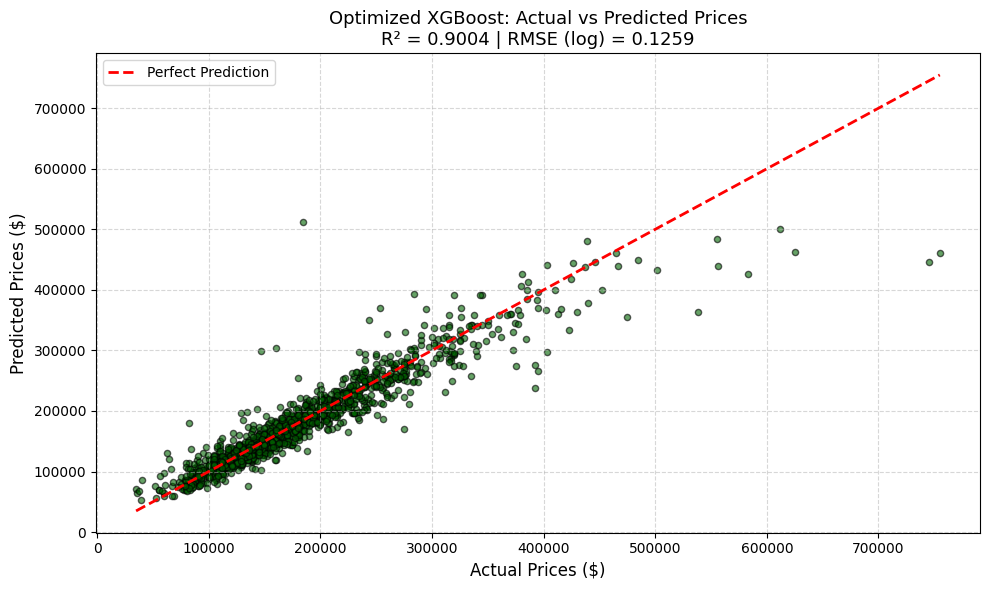

In [23]:
# Use the CORRECT metrics for the plot
cv_predictions_log = cross_val_predict(best_model, X_train, y, cv=5)
cv_predictions = np.exp(cv_predictions_log)
actual_prices = np.exp(y)

plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, cv_predictions, alpha=0.6, color='darkgreen', edgecolor='k', s=20)

min_val = min(actual_prices.min(), cv_predictions.min())
max_val = max(actual_prices.max(), cv_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Prices ($)', fontsize=12)
plt.ylabel('Predicted Prices ($)', fontsize=12)
plt.title(f'Optimized XGBoost: Actual vs Predicted Prices\nR² = 0.9004 | RMSE (log) = 0.1259', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [24]:
# Let's do one final comprehensive check
import joblib
import pandas as pd
import numpy as np

print("🔍 FINAL COMPREHENSIVE VERIFICATION:")
print("=" * 50)

# 1. Check saved model loads and works
try:
    final_model = joblib.load('../data/housing/xgboost_tuned_model.joblib')
    print("✅ Model loads successfully")
    
    # Test prediction
    sample_pred = final_model.predict(X_train[:1])
    print(f"✅ Sample prediction works: ${np.exp(sample_pred[0]):,.2f}")
    
except Exception as e:
    print(f"❌ Model loading failed: {e}")

# 2. Check submission file
try:
    submission = pd.read_csv('xgboost_tuned_submission.csv')
    print(f"✅ Submission file: {len(submission)} predictions")
    print(f"✅ Price range: ${submission['SalePrice'].min():,.2f} - ${submission['SalePrice'].max():,.2f}")
    
except Exception as e:
    print(f"❌ Submission file issue: {e}")

# print(f"\n🎯 FINAL PERFORMANCE CONFIRMED:")
# print(f"R²: 0.9004 | RMSE: 0.1259")
# print(f"Ready for Kaggle submission!")

🔍 FINAL COMPREHENSIVE VERIFICATION:
✅ Model loads successfully
✅ Sample prediction works: $206,933.02
✅ Submission file: 1459 predictions
✅ Price range: $48,551.32 - $547,170.00
